In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
data = pd.read_csv(r"C:\Users\Diya\Downloads\breast_cancer_encoded_dataset.csv")  

# Display the first few rows of the dataset
print("Dataset Shape:", data.shape)
print("\nDataset Info:")
print(data.info())
print("\nFirst 5 Rows of Dataset:")
print(data.head())
print("\nSummary Statistics:")
print(data.describe())

Dataset Shape: (569, 12)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   radius             569 non-null    float64
 1   texture            569 non-null    float64
 2   perimeter          569 non-null    float64
 3   area               569 non-null    float64
 4   smoothness         569 non-null    float64
 5   compactness        569 non-null    float64
 6   concavity          569 non-null    float64
 7   symmetry           569 non-null    float64
 8   Fractal_Dimension  569 non-null    float64
 9   diagnosis_encoded  569 non-null    int64  
 10  diagnosis_B        569 non-null    int64  
 11  diagnosis_M        569 non-null    int64  
dtypes: float64(9), int64(3)
memory usage: 53.5 KB
None

First 5 Rows of Dataset:
   radius  texture  perimeter    area  smoothness  compactness  concavity  \
0   17.99    10.38     1

In [3]:
print("\nMissing Values:\n", data.isnull().sum())


Missing Values:
 radius               0
texture              0
perimeter            0
area                 0
smoothness           0
compactness          0
concavity            0
symmetry             0
Fractal_Dimension    0
diagnosis_encoded    0
diagnosis_B          0
diagnosis_M          0
dtype: int64


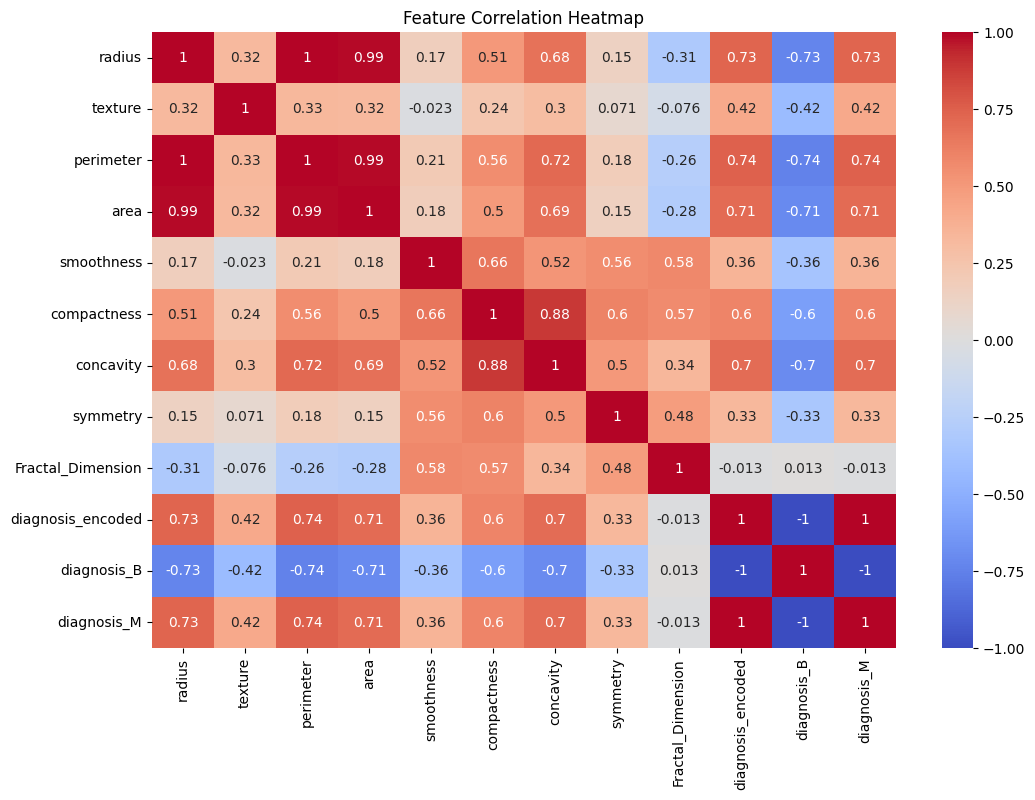

In [4]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

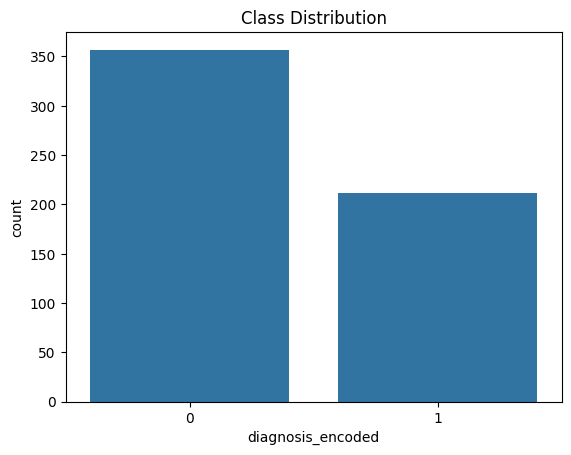

In [5]:
# Visualize class distribution
sns.countplot(x='diagnosis_encoded', data=data)
plt.title("Class Distribution")
plt.show()

Original dataset shape: (569, 11)
Dataset shape after outlier removal: (502, 11)
Dataset shape after standardization: (502, 11)


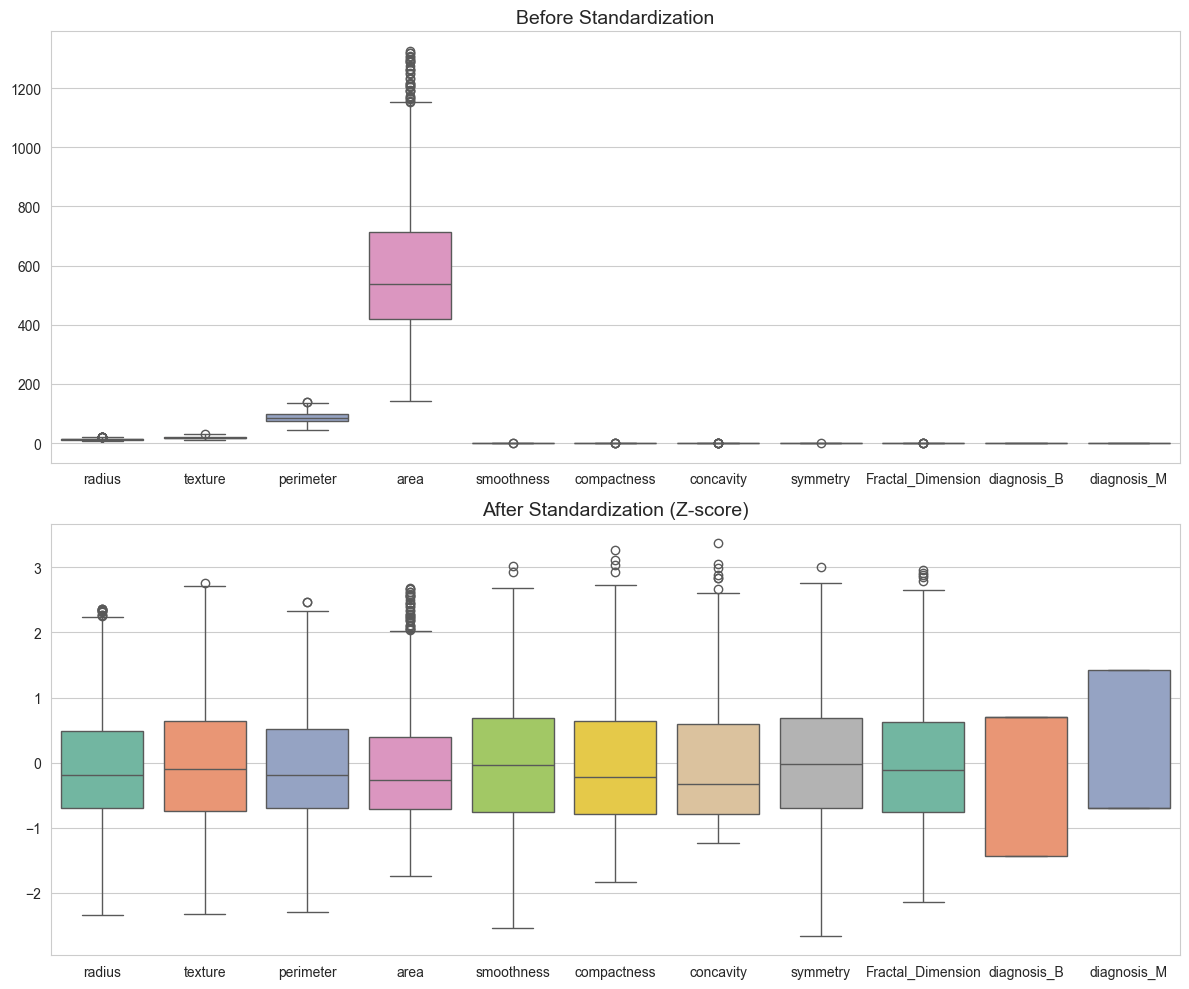

In [6]:
# Drop the target column 
data = data.drop(columns=['diagnosis_encoded'], errors='ignore')

# Detect outliers using the IQR method
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data_cleaned = data[~((data < lower_bound) | (data > upper_bound)).any(axis=1)]

# Apply Standardization (Z-score normalization)
scaler = StandardScaler()
data_standardized = pd.DataFrame(scaler.fit_transform(data_cleaned), columns=data_cleaned.columns)

# Print dataset shape before and after preprocessing
print(f"Original dataset shape: {data.shape}")
print(f"Dataset shape after outlier removal: {data_cleaned.shape}")
print(f"Dataset shape after standardization: {data_standardized.shape}")

# Set plot style
sns.set_style("whitegrid")

# Plot box plots before and after standardization
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Box plot before standardization
sns.boxplot(data=data_cleaned, ax=axes[0], palette="Set2")
axes[0].set_title("Before Standardization", fontsize=14)

# Box plot after standardization
sns.boxplot(data=data_standardized, ax=axes[1], palette="Set2")
axes[1].set_title("After Standardization (Z-score)", fontsize=14)

plt.tight_layout()
plt.show()

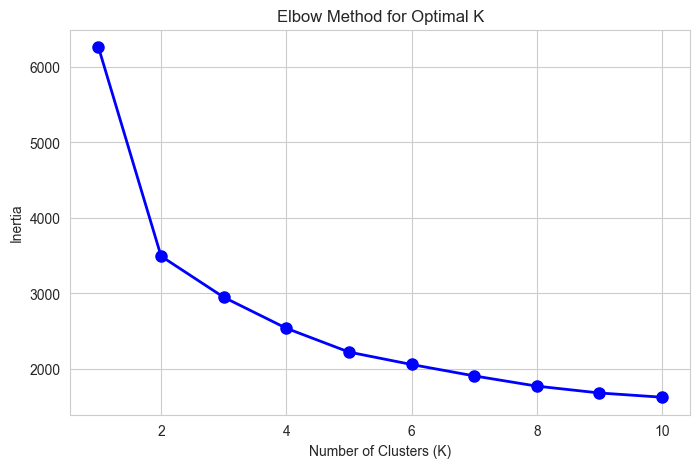

In [7]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Using the Elbow Method to find optimal number of clusters
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-', markersize=8, linewidth=2)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


Silhouette Score for 3 clusters: 0.4030


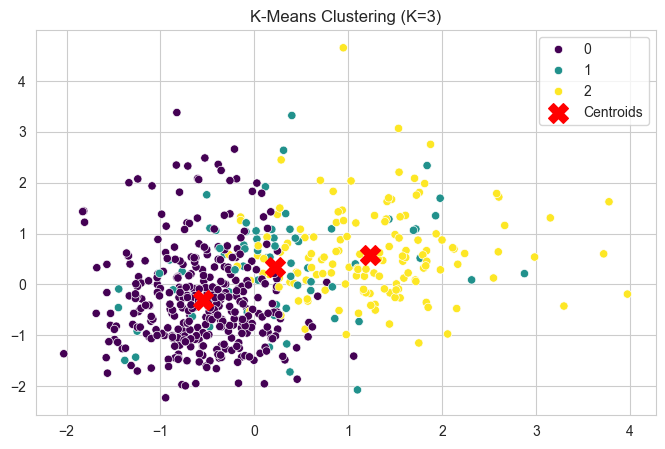

In [8]:
# Choosing the optimal number of clusters based on the elbow method (e.g., 3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(scaled_data)

# Add the cluster labels to the original dataframe
data['Cluster'] = clusters

# Evaluate the clustering performance using Silhouette Score
silhouette_avg = silhouette_score(scaled_data, clusters)
print(f"\nSilhouette Score for {optimal_k} clusters: {silhouette_avg:.4f}")

# Visualization of Clusters using the first two principal components
plt.figure(figsize=(8,5))
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=clusters, palette='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title(f'K-Means Clustering (K={optimal_k})')
plt.legend()
plt.show()

In [12]:
# The dataset is first explored and the target column ('diagnosis_encoded') is removed, as K-Means is an unsupervised learning algorithm.
# Features are standardized using StandardScaler to ensure fair clustering performance.
# The Elbow Method is used to find the optimal number of clusters by plotting inertia values.
# K-Means clustering is performed using the optimal K value determined from the Elbow Method.
# The Silhouette Score evaluates the clustering quality (higher values indicate better clusters).
# The final clusters are visualized using the first two feature dimensions.

In [1]:
# The three clusters represent different patterns in your dataset, grouping similar data points together.
# If your dataset relates to breast cancer (as seen earlier), the clusters may separate different groups of patients based on risk factors.
# Each cluster centroid (red X) represents the "average" characteristics of patients in that group.
# A moderate silhouette score (0.403) indicates that the clusters have some overlap, meaning some features might not be fully distinguishable.
# This clustering helps in identifying hidden patterns, such as groups of patients who may require different levels of medical attention.